In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import scipy.optimize as sco
import scipy.constants as c
from scipy.optimize import curve_fit as cf
import pandas as pd

In [2]:
# Von anfang an sind 32 ns delay inklusive
# delay gibt nur ZUSÄTZLICHEN wert an
delay=[0,4,8,12,20,28,40,52,60,70,80,95]
guesses=np.linspace(300,1000,len(delay))

def gaussian(x,A,mu,sig,b):
    return A* np.exp( - (x-mu)**2 / 2 / sig**2 ) +b
def gerade(x,a,b):
    return a*x +b

340.112126257 1.00025438427
391.877928697 0.987297670677
436.983904656 0.986133579078
493.427674589 0.988275406614
511.586815106 1.02267633459
572.561151477 1.03698302846
643.294665378 1.14278553766
722.817887895 1.0920479108
783.789768318 1.10960449762
869.304105421 1.15351532968
954.100482392 1.18973390246
1083.50350711 1.16342014443


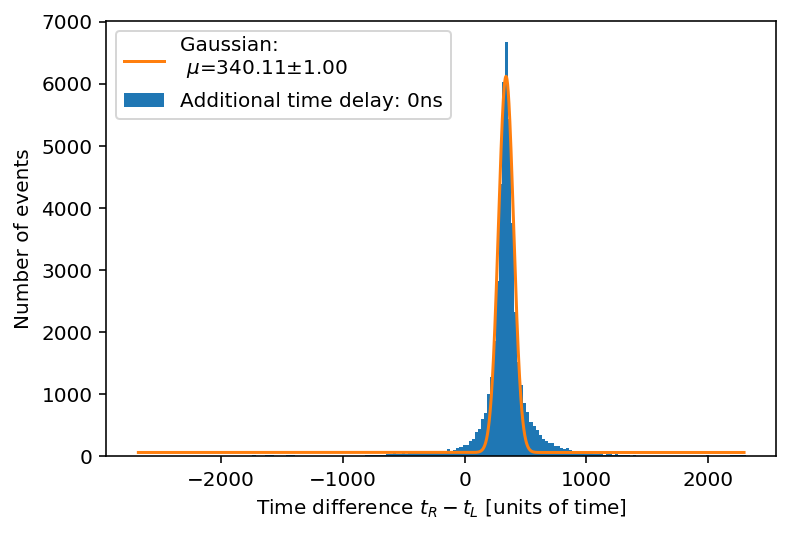

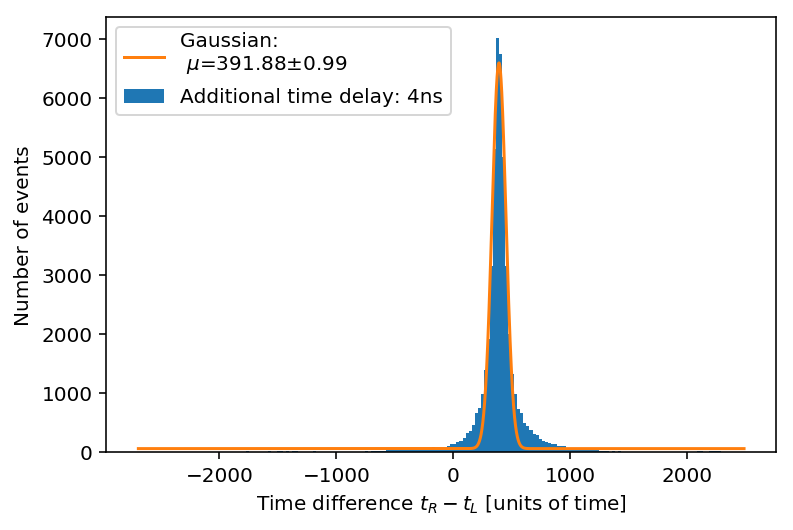

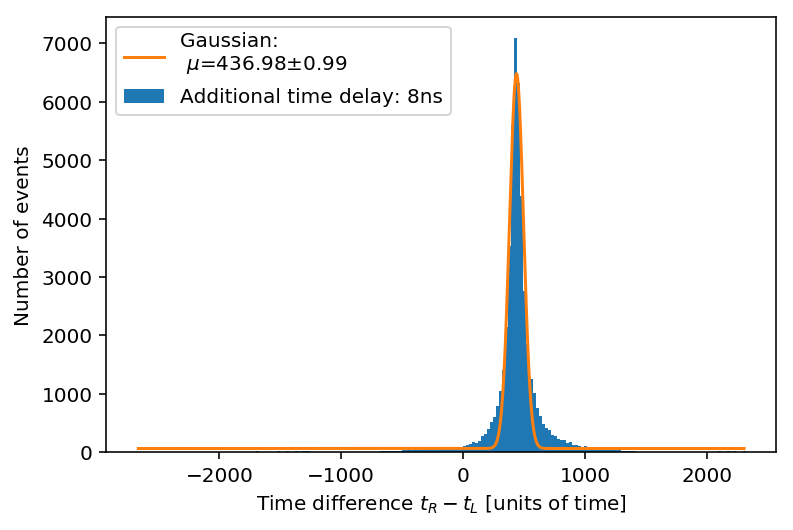

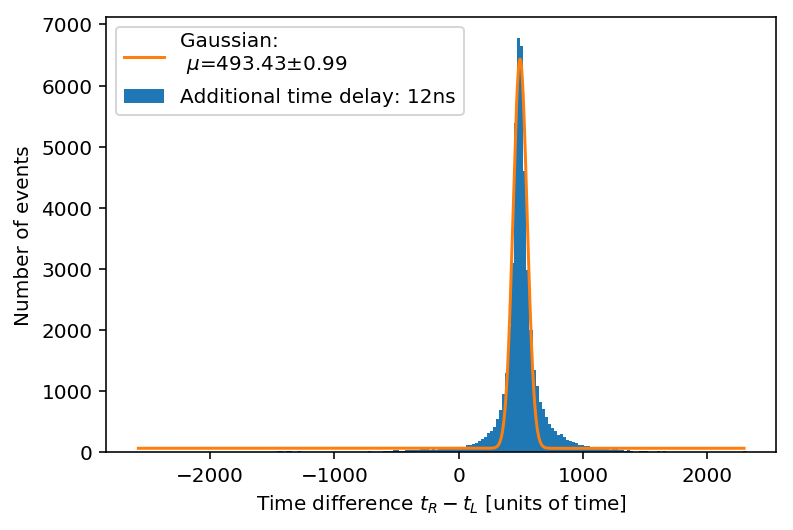

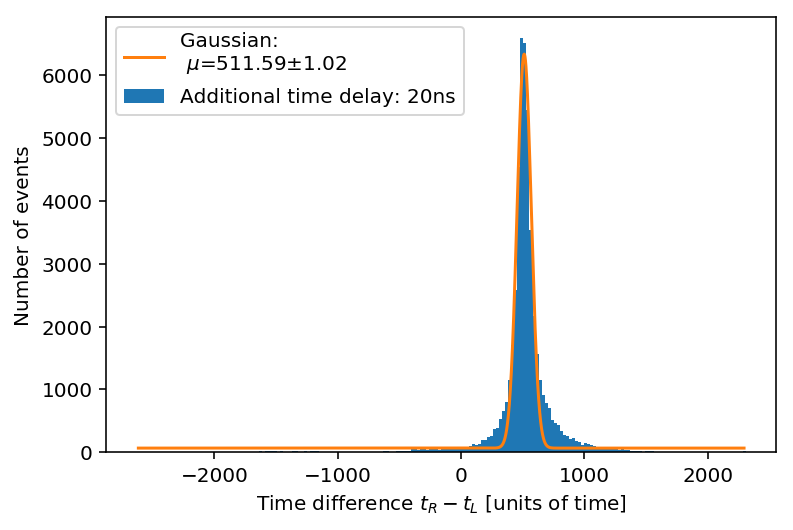

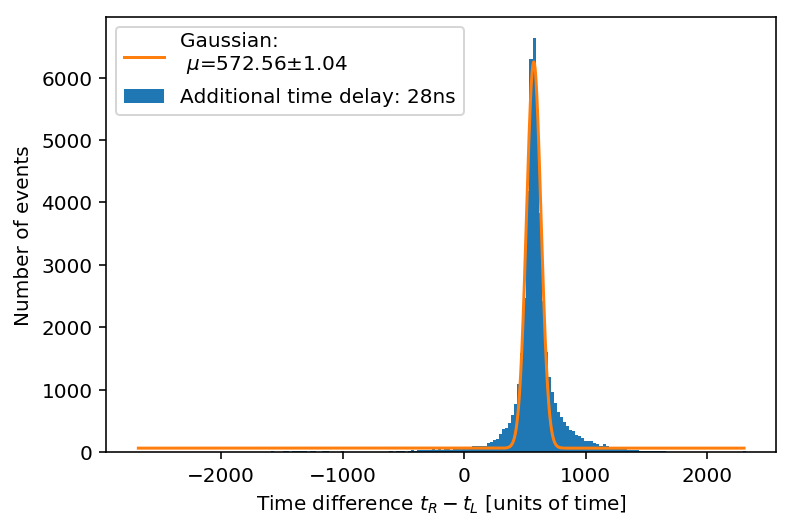

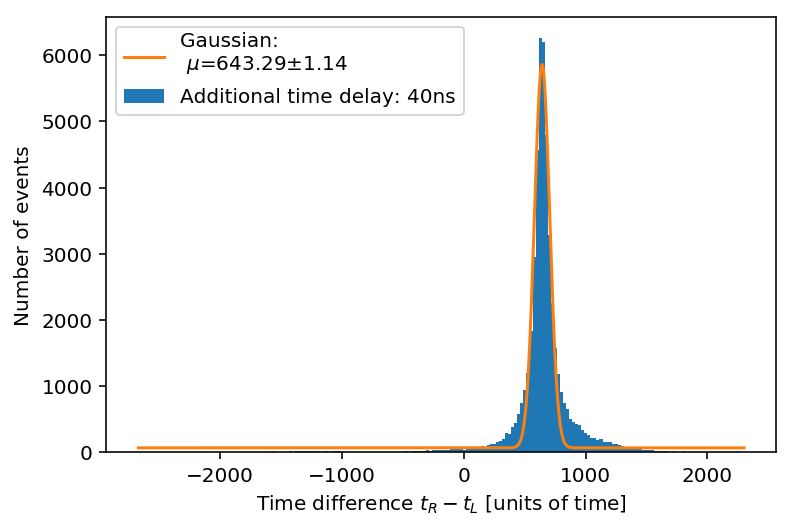

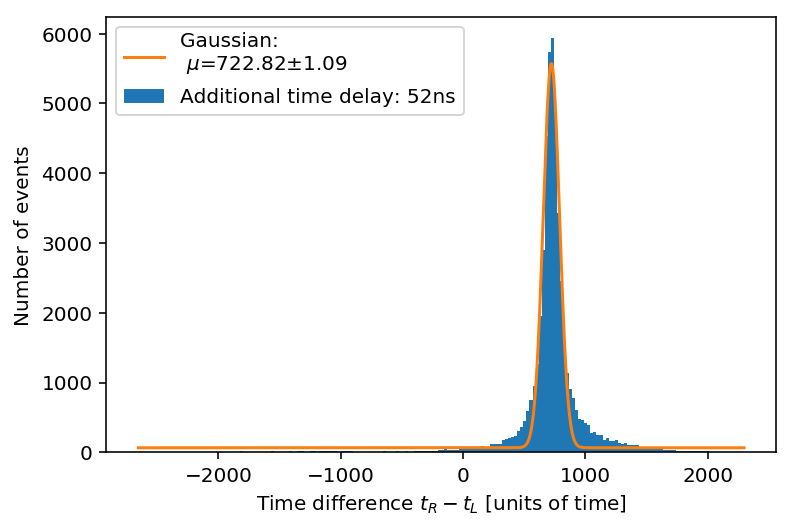

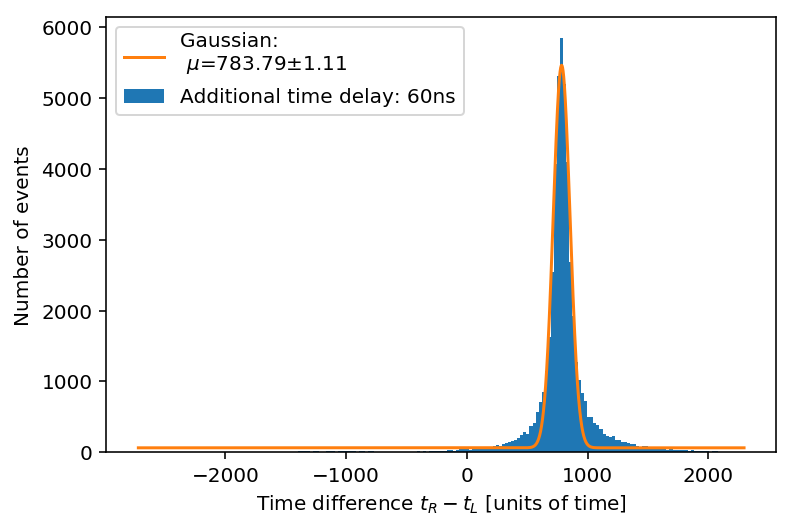

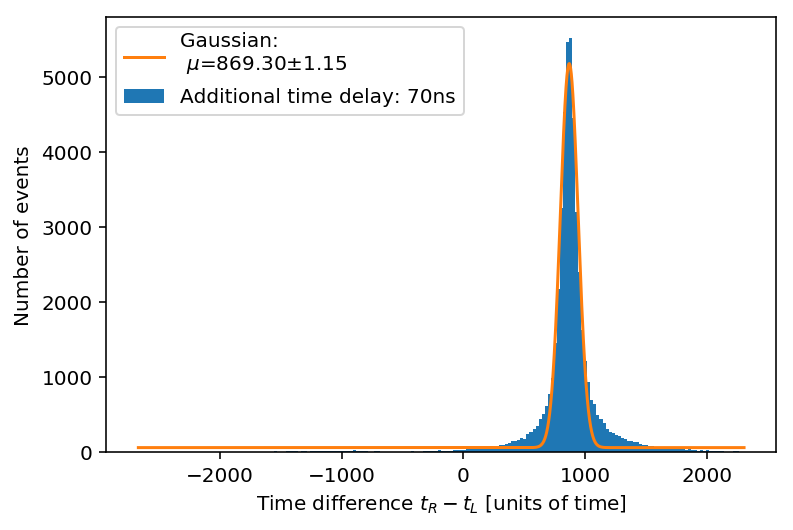

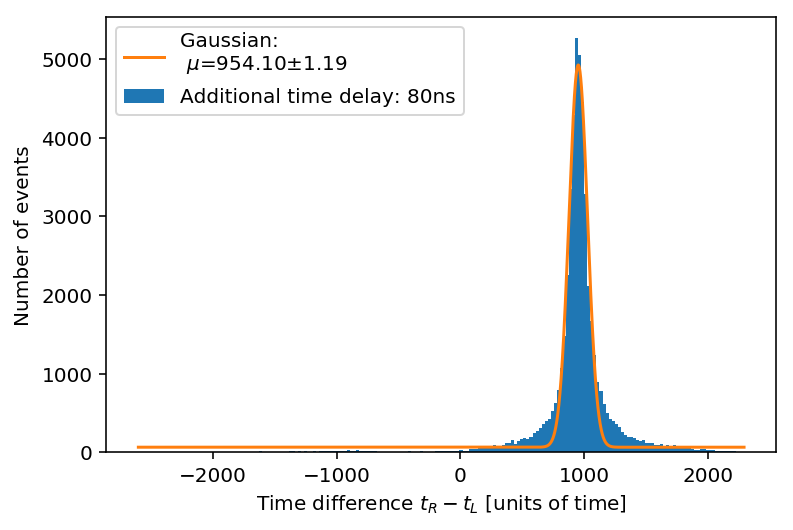

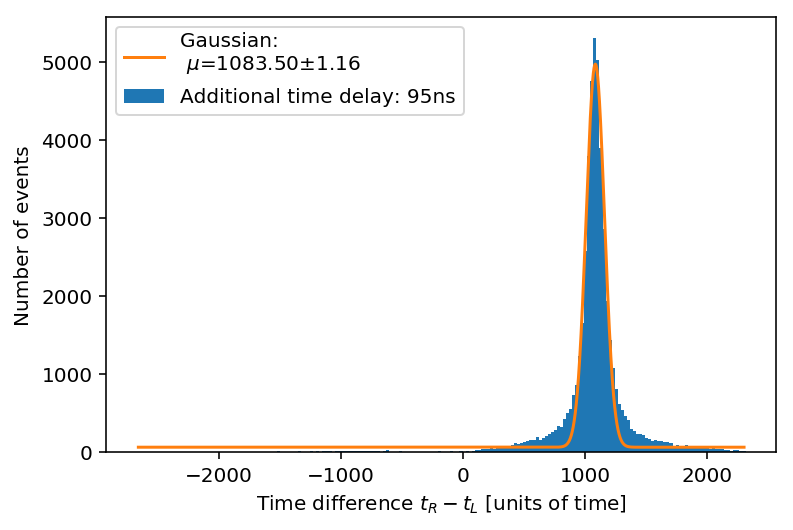

In [3]:
def getHist(delay,guess_mu):
    data=pd.read_table("Data/timecalibration{}.txt".format(delay),skiprows=0,delim_whitespace =True)
    num=np.array(data.values[:,0])
    ADC1=np.array(data.values[:,1])
    ADC2=np.array(data.values[:,2])
    TDC1=np.array(data.values[:,6])
    TDC2=np.array(data.values[:,7])

    t_diff= TDC2-TDC1

    fig,ax=plt.subplots(dpi=144)
    temp =ax.hist(t_diff,bins=200,label="Additional time delay: {}ns".format(delay))
    count, diff= temp[0],[ (temp[1][i]+temp[1][i+1])/2 for i in range(len(temp[0]))]
    ## ax.hist gibt anzahl und >>bin edges<< zurück... #Kein arabischer Terroristen Fürst

    xrange=np.linspace(min(diff),max(diff),10000)
    popt,pcov=cf(gaussian, diff, count, p0=[5000,guess_mu,100,0])
    perr=np.sqrt(np.diag(pcov))
    ax.plot(xrange,gaussian(xrange,*popt),label="Gaussian: \n $\mu$={:.2f}$\pm${:.2f}".format(popt[1],perr[1]))

    ax.set(xlabel="Time difference $t_R - t_L$ [units of time]", ylabel="Number of events")
    ax.legend()
    fig.savefig("Plots/Time/{}ns.png".format(delay))
    
    return popt[1],perr[1] #mu, dmu=sig ????

muList,dmuList=[],[]
for i in range(len(delay)):
    dope=getHist(delay[i],guesses[i])
    muList.append(dope[0])
    dmuList.append(dope[1])

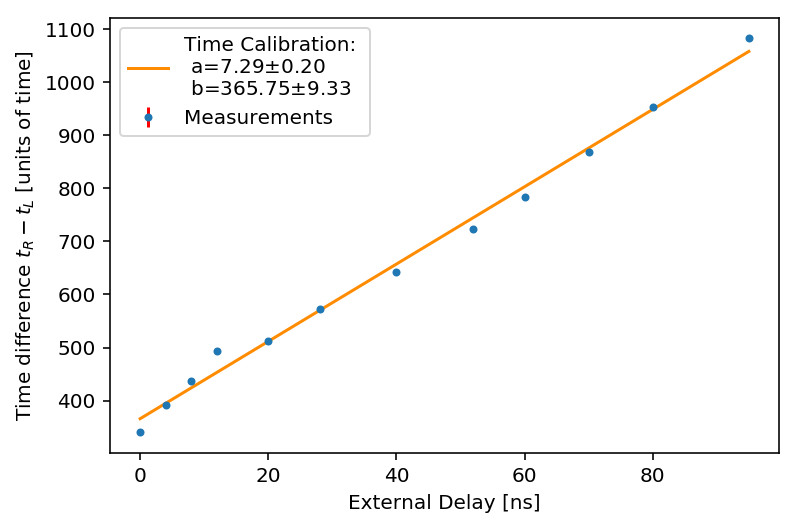

In [4]:
popt,pcov=cf(gerade, delay, muList,sigma=dmuList,p0=[10,300])
perr=np.sqrt(np.diag(pcov))

xrange=np.linspace(delay[0],delay[-1],1000)
fig,ax=plt.subplots(dpi=144)
ax.errorbar(delay,muList,yerr=dmuList,fmt=" ",marker=".",label="Measurements",ecolor="red")
ax.plot(xrange,gerade(xrange,*popt),color="darkorange",
        label="Time Calibration: \n a={o[0]:.2f}$\pm${e[0]:.2f} \n b={o[1]:.2f}$\pm${e[1]:.2f}".format(o=popt,e=perr))
ax.set(xlabel="External Delay [ns]",ylabel="Time difference $t_R - t_L$ [units of time]")

ax.legend();

fig.savefig("Plots/TimeCalibration.png")
# Dh 100ns entsprechen 729 \pm 20 Zeiteinheiten
# b entsteht durch die 32ns delay offset und kabel delay, daher viel